**Fin 585R**  
**Diether**  
**Empirical Distribution of Stock Returns**

**Before Class**

+ You should work through this material before coming to class.<br>

+ Consider it a pre class reading assignment.<br>

**1 Overview**

+ This notebook shows how to plot empirical distributions using Python and overlay the normal distribution.<br>

+ The notebook plots the empirical histogram of a value-weight portfolio of all stocks and then overlays the normal distribution with the same mean and standard deviation.<br>

+ I use matplotlib for plotting $\leftarrow$ core plotting library for Python.<br>

+ I don't think matplotlib is very intuitive. <br>

+ I pretty much just borrow from examples and consult the documention to do things.<br>

+ It's in that spirit that I think this code will be useful.<br>


In [7]:
import pandas as pd
import numpy as np

In [8]:
stk = pd.read_csv("https://diether.org/prephd/04-msi.csv",parse_dates=['caldt'])
stk

,caldt,mkt,ewmkt
0,1926-01-30,0.000561,0.023174
1,1926-02-27,-0.033046,-0.053510
2,1926-03-31,-0.064002,-0.096824
3,1926-04-30,0.037029,0.032975
4,1926-05-28,0.012095,0.001035
...,...,...,...
1180,2024-05-31,0.046551,0.041764
1181,2024-06-28,0.026074,-0.018903
1182,2024-07-31,0.019880,0.047866
1183,2024-08-30,0.021573,-0.010883


**2 Aggregate Monthly Stock Market Returns**

**2.1 A Value Weight Portfolio**

+ `mkt` refers to the return on the market portfolio: value-weight index of all publicly traded in the United States). <br>

+ A value-weight portfolio of all stocks is generally what we mean when referring to the aggregate stock market.<br>

+ These are monthly returns. <br>

+ I like my returns in percent.<br>

+ So I generally multiple portfolio returns by 100. <br>

+ **Monthly returns in percent** $\rightarrow$

In [9]:
stk['mkt'] = stk['mkt']*100
stk['mkt'].describe().round(3)

count    1185.000
mean        0.934
std         5.312
min       -29.173
25%        -1.834
50%         1.300
75%         3.934
max        39.414
Name: mkt, dtype: float64

<br>

**2.2 Plotting the empirical distribution**

+ Can plot the empirical distribution of the market portfolio returns using a pandas' method.<br>

+ In this case $\rightarrow$ **histogram method.** <br>

+ The pandas part is straightforward.<br>

+ **Enter matplotlib** $\rightarrow$ allows us to augment and customize the plot

  + First, I assign the plotting object from Pandas to the variable called `ax`.<br>
  
  + Allows me to call methods for labeling the graph from matplotlib (like adding a title). <br>

  + Second, I also create some custom colors that I like better.<br>

In [10]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

red = "#C80815"
blue = "#1560BD"

(-30.0, 30.0)

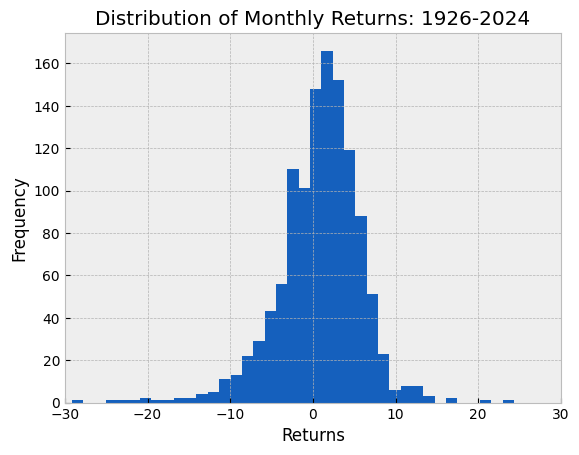

In [11]:
ax = stk['mkt'].plot.hist(bins = 50,color=blue)
ax.set_xlabel('Returns')
ax.set_title('Distribution of Monthly Returns: 1926-2024')
ax.set_xlim(-30,30)

**2.3 Overylaying the normal distribution**

+ Overlaying the normal distribution with the same mean and standard deviation as the empirical distribution is a little bit more work. <br>

+ I do all the plotting `matplotlib` directly.<br>

+ Also need to use the `scipy` library.<br>

+ The scipy library contains lots of functions related to data analysis and statistics.<br>

+ For example, it includes denisty functions for various distributions. <br>

+ Including the normal distribution<br>

+ **Plotting the empirical histogram and the normal overlay** $\rightarrow$

  1. I overlay the normal distribution using the mean and standard deviation of the empirical distribution. I do that by computing the normal pdf corrresponding to each return in the data (market portfolio returns). I call that array, fit.<br>

  2. I plot the empirical distribution directly in matplotlib. The syntax is pretty similar to the `pandas` code I used above.

+ Note, I call the `subplot` function before actually plotting stuff. I do that so my plotting object has a name (`ax`). This allows me to label the x-axis and title the plot easily.

In [12]:
from scipy.stats import norm
x = sorted(stk['mkt'])
fit = norm.pdf(x, np.mean(x), np.std(x))

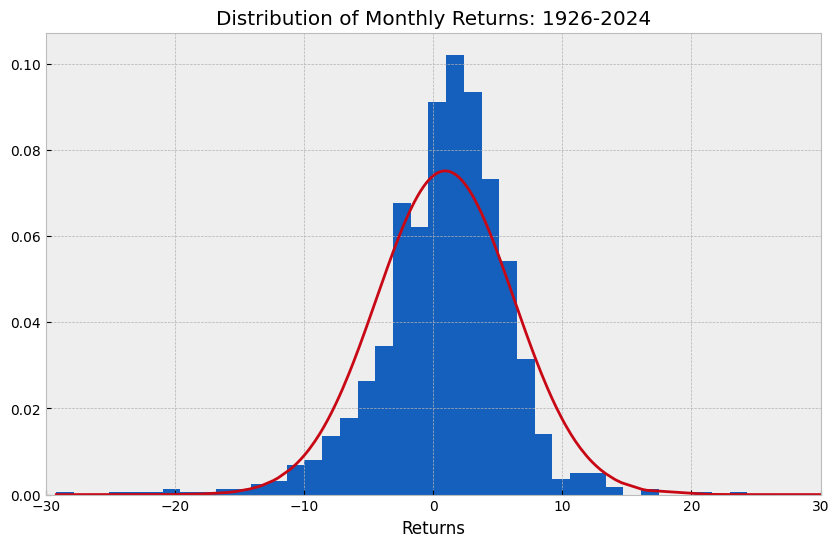

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.set_xlabel('Returns')
ax.set_title('Distribution of Monthly Returns: 1926-2024')
ax.set_xlim(-30,30)

plt.plot(x,fit,color=red)
plt.hist(x,density=True,bins=50,color=blue);

**2.4 Questions for class**

Generally, academic finance assumes stock returns are normally distributed.

1. Is normality a good assumption for monthly stock returns?<br>

2. In what ways does the empirical distribution deviate from the normal distribution for monthly stock returns?<br>

**3 Empirical Distribution of Daily Returns**

+ Some code as I used for the monthly portfolio returns

In [14]:
stk = pd.read_csv("https://diether.org/prephd/04-dsi.csv",parse_dates=['caldt'])

stk['mkt'] = stk['mkt']*100
stk['mkt'].describe().round(3)

count    25986.000
mean         0.042
std          1.071
min        -17.135
25%         -0.386
50%          0.076
75%          0.507
max         15.684
Name: mkt, dtype: float64

In [15]:
x = sorted(stk['mkt'])
fit = norm.pdf(x, np.mean(x), np.std(x))

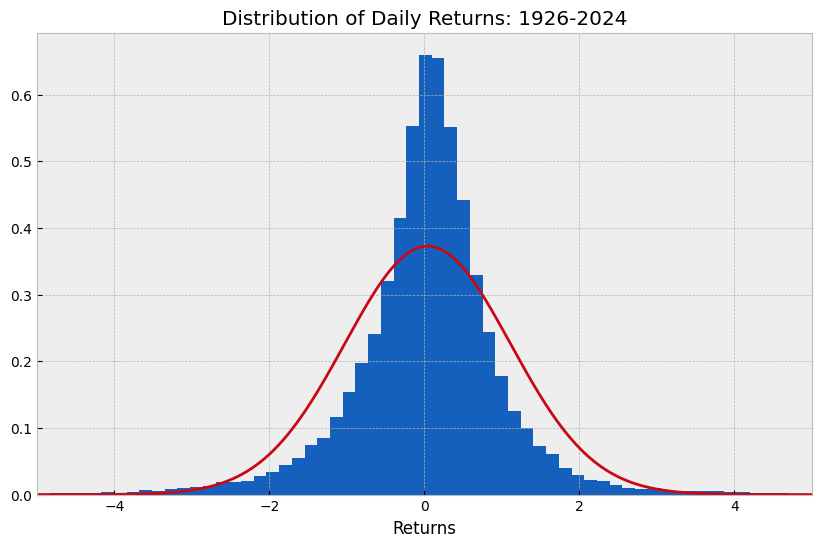

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.set_xlabel('Returns')
ax.set_title('Distribution of Daily Returns: 1926-2024')
ax.set_xlim(-5,5)

plt.plot(x,fit,color=red)
plt.hist(x,density=True,bins=200,color=blue);

**3.1 Questions for class**

1. Is normality a good assumption for daily stock returns?<br>

2. In what ways does the empirical distribution deviate from the normal distribution for daily stock returns?